In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
df.shape

(263, 20)

In [6]:
# Ridge
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [7]:
lambdas = 10**np.linspace(10,-2,100)*0.05
lambdas

array([5.00000000e+08, 3.78231664e+08, 2.86118383e+08, 2.16438064e+08,
       1.63727458e+08, 1.23853818e+08, 9.36908711e+07, 7.08737081e+07,
       5.36133611e+07, 4.05565415e+07, 3.06795364e+07, 2.32079442e+07,
       1.75559587e+07, 1.32804389e+07, 1.00461650e+07, 7.59955541e+06,
       5.74878498e+06, 4.34874501e+06, 3.28966612e+06, 2.48851178e+06,
       1.88246790e+06, 1.42401793e+06, 1.07721735e+06, 8.14875417e+05,
       6.16423370e+05, 4.66301673e+05, 3.52740116e+05, 2.66834962e+05,
       2.01850863e+05, 1.52692775e+05, 1.15506485e+05, 8.73764200e+04,
       6.60970574e+04, 5.00000000e+04, 3.78231664e+04, 2.86118383e+04,
       2.16438064e+04, 1.63727458e+04, 1.23853818e+04, 9.36908711e+03,
       7.08737081e+03, 5.36133611e+03, 4.05565415e+03, 3.06795364e+03,
       2.32079442e+03, 1.75559587e+03, 1.32804389e+03, 1.00461650e+03,
       7.59955541e+02, 5.74878498e+02, 4.34874501e+02, 3.28966612e+02,
       2.48851178e+02, 1.88246790e+02, 1.42401793e+02, 1.07721735e+02,
      

In [8]:
ridge_model = Ridge()
coefficients = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    coefficients.append(ridge_model.coef_)

In [9]:
coefficients

[array([ 9.11592094e-03,  3.07582422e-03,  4.51910113e-04,  1.69407309e-03,
         1.60190650e-03,  1.32981697e-03,  6.49590290e-05,  6.45533472e-02,
         2.02817085e-02,  2.96073246e-03,  1.14324125e-02,  1.15486681e-02,
         7.85934792e-03,  1.69789361e-02,  1.26843659e-03,  3.83574552e-05,
         1.54235292e-06, -1.51537202e-05,  2.06011404e-06]),
 array([ 1.17557781e-02,  3.97783554e-03,  5.81141298e-04,  2.19877138e-03,
         2.05820112e-03,  1.71490685e-03,  5.61631014e-05,  6.92014286e-02,
         2.22119493e-02,  3.43305417e-03,  1.27920388e-02,  1.30654988e-02,
         8.73463429e-03,  2.20096052e-02,  1.63451550e-03,  5.12226357e-05,
         1.91919358e-06, -2.00055415e-05,  2.53488398e-06]),
 array([ 1.51640590e-02,  5.14576862e-03,  7.47899582e-04,  2.85378242e-03,
         2.64632298e-03,  2.21312617e-03,  4.05398497e-05,  7.30169510e-02,
         2.40934168e-02,  3.98407351e-03,  1.42502636e-02,  1.47412502e-02,
         9.64986414e-03,  2.84460466e-02, 

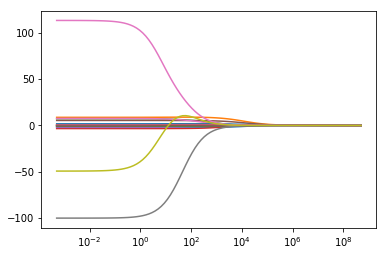

In [10]:
ax = plt.gca()
ax.plot(lambdas, coefficients)
ax.set_xscale("log")

In [11]:
# Prediction
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)

In [12]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [13]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [14]:
# Train Error
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.3447069600656

In [15]:
# k fold cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')))

351.39315856063536

In [16]:
# Test Error
y_pred2 = ridge_model.predict(X_test)

In [17]:
RMSE2 = np.sqrt(mean_squared_error(y_test, y_pred2))
RMSE2

356.8082905730228

### Model Tuning

In [19]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730228

In [23]:
lambdas1 = np.random.randint(0, 1000, 100)

In [24]:
lambdas2 = 10**np.linspace(10,-2,100)*0.05

In [29]:
ridgecv = RidgeCV(alphas = lambdas2, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([5.00000e+08, 3.78232e+08, ..., 6.60971e-04, 5.00000e-04]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [26]:
# Optimum alpha
ridgecv.alpha_

0.708737081463401

In [27]:
# Final Model
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [28]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.86961125026835